In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [3]:
dataset = pd.read_csv("pandas.csv")
bulan = dataset.iloc[:, :-4].values
stasiun_pengisian = dataset.iloc[:, 1].values
jenis_bahan_bakar = dataset.iloc[:, 2].values
jumlah_penjualan = dataset.iloc[:, 3].values
pajak = dataset.iloc[:, 4].values

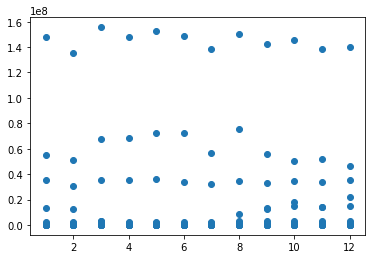

In [5]:
x = bulan
y = jumlah_penjualan
plt.scatter(x, y)
plt.show()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
bulan                           156 non-null int64
stasiun_pengisian_bahanbakar    156 non-null object
jenis_bahanbakar                156 non-null object
jumlah_penjualan                156 non-null int64
penerimaan_pajak                156 non-null int64
dtypes: int64(3), object(2)
memory usage: 6.2+ KB


In [7]:
dataset.describe()

,bulan,jumlah_penjualan,penerimaan_pajak
count,156.00000,1.560000e+02,1.560000e+02
mean,6.50000,1.989622e+07,6.564382e+09
std,3.46317,4.043460e+07,1.287234e+10
min,1.00000,0.000000e+00,0.000000e+00
25%,3.75000,6.649100e+04,3.566135e+07
50%,6.50000,8.200000e+05,5.067902e+08
75%,9.25000,1.475700e+07,5.319854e+09
max,12.00000,1.556153e+08,4.932697e+10


In [8]:
dataset.columns

Index(['bulan', 'stasiun_pengisian_bahanbakar', 'jenis_bahanbakar',
       'jumlah_penjualan', 'penerimaan_pajak'],
      dtype='object')

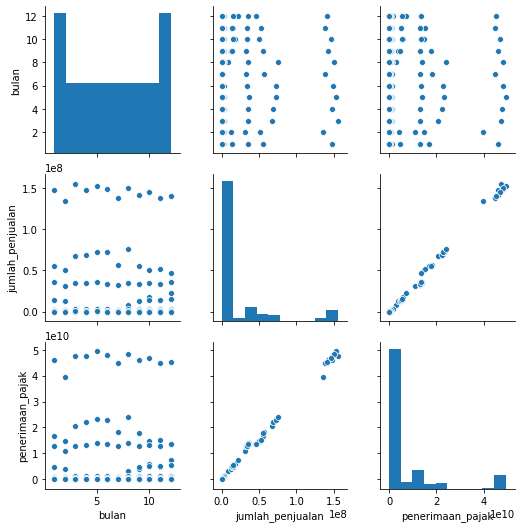

In [9]:
sns.pairplot(dataset)

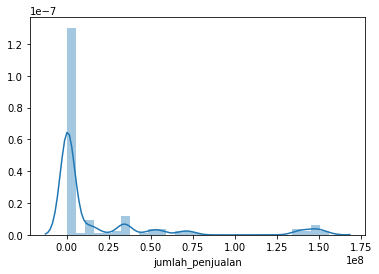

In [10]:
sns.distplot(dataset["jumlah_penjualan"],kde=True)

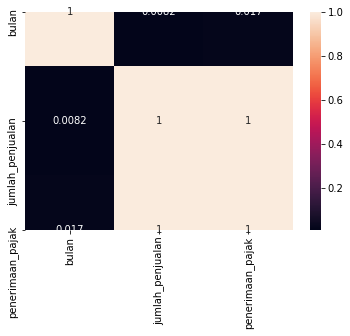

In [11]:
sns.heatmap(dataset.corr(), annot=True)

In [12]:
X = dataset[['bulan']]

In [13]:
Y = dataset["jumlah_penjualan"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lm.intercept_)

24324931.91894737


In [20]:
lm.coef_

array([-713601.97394737])

In [21]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])

In [23]:
cdf

,Coeff
bulan,-713601.973947


In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = regressor.predict(X_test)

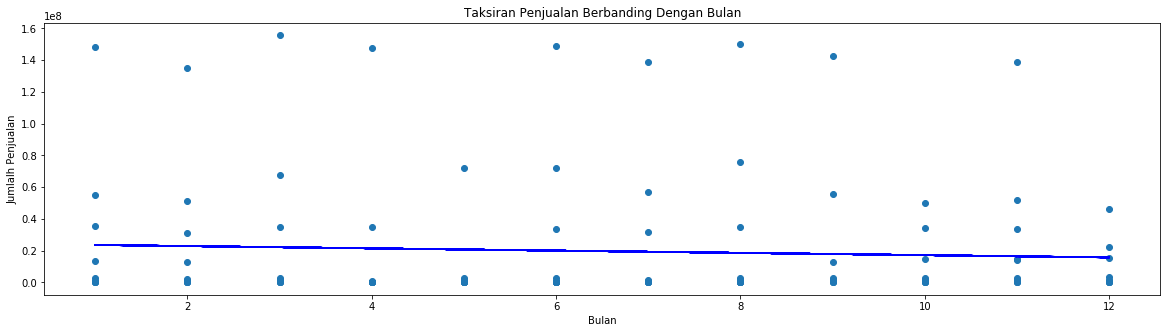

In [41]:
plt.figure(figsize=(20,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Taksiran Penjualan Berbanding Dengan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlalh Penjualan")
plt.show()

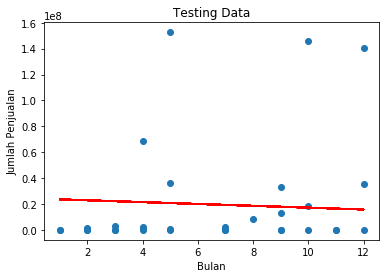

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train),color="red")
plt.title("Testing Data")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penjualan")
plt.show()

In [28]:
prediction = lm.predict(X_test)

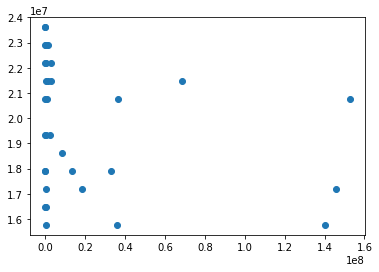

In [29]:
plt.scatter(y_test,prediction)

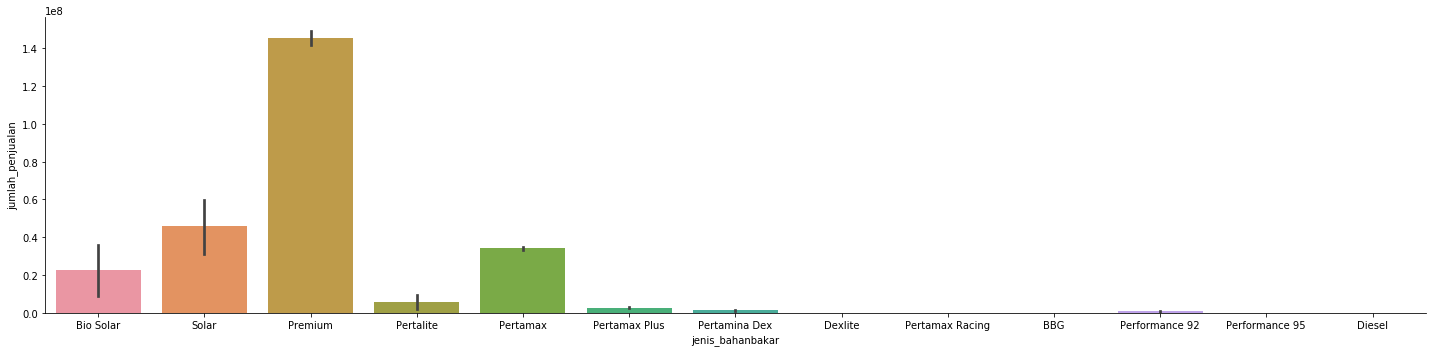

In [40]:
sns.catplot(x="jenis_bahanbakar", y="jumlah_penjualan", kind="bar",data=datas, aspect=4)

# K-Nearest Neighbor

In [31]:
datas = pd.read_csv("pandas.csv")

In [35]:
dataset.head()

,bulan,stasiun_pengisian_bahanbakar,jenis_bahanbakar,jumlah_penjualan,penerimaan_pajak
0,1,Pertamina,Bio Solar,55232675,16813838145
1,1,Pertamina,Solar,13531625,4631822667
2,1,Pertamina,Premium,148118500,46128488066
3,1,Pertamina,Pertalite,0,0
4,1,Pertamina,Pertamax,35750000,13041124794


In [195]:
x = dataset

df = pd.DataFrame(x, columns = dataset.columns)

df.head()

,bulan,stasiun_pengisian_bahanbakar,jenis_bahanbakar,jumlah_penjualan,penerimaan_pajak
0,1,Pertamina,Bio Solar,55232675,16813838145
1,1,Pertamina,Solar,13531625,4631822667
2,1,Pertamina,Premium,148118500,46128488066
3,1,Pertamina,Pertalite,0,0
4,1,Pertamina,Pertamax,35750000,13041124794


In [197]:
from sklearn.neighbors import KNeighborsClassifier